In [13]:
from torchvision.models import resnet18,VisionTransformer

In [95]:
import torch.nn as nn

def GCAM(img, model, layer:int=5):
    model_layers = [layer for layer in model.children()]

    model_start = nn.Sequential(*model_layers[:layer])
    model_end = nn.Sequential(*model_layers[layer:-1])
    model_last = model_layers[-1]

    x = model_start(img)
    x.retain_grad()
    z = model_end(x)
    z = z.squeeze().unsqueeze(0)
    z = model_last(z)

    # do back propagation
    z[0,1].backward()
    activations = nn.functional.relu(x*x.grad).squeeze().sum(0).detach().cpu()
    return activations

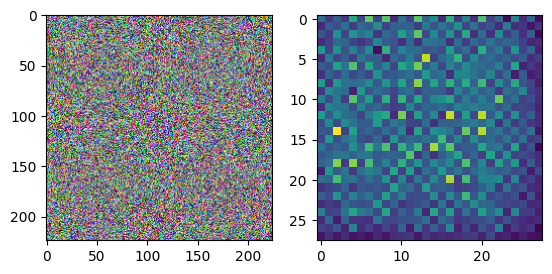

In [96]:
import torch
import matplotlib.pyplot as plt

M = resnet18(progress=True)
img = torch.rand((1,3,224,224))

act = GCAM(img,M,6)

fig, ax = plt.subplots(1,2)
ax[0].imshow(img.squeeze().numpy().transpose(1,2,0))
ax[1].imshow(act.numpy())